##DATA COLLECTION

In [5]:
import seaborn as sns
import pandas as pd

In [6]:
df=sns.load_dataset('tips')

In [7]:
#Simple Linear Regression
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


##UNDERSTANDING THE DATASET


In [8]:
df.info()
#total_bill->Input
#Tip->Output

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


Stats Summary

In [9]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Relationship Check-Before using any model,we must confirm relationship

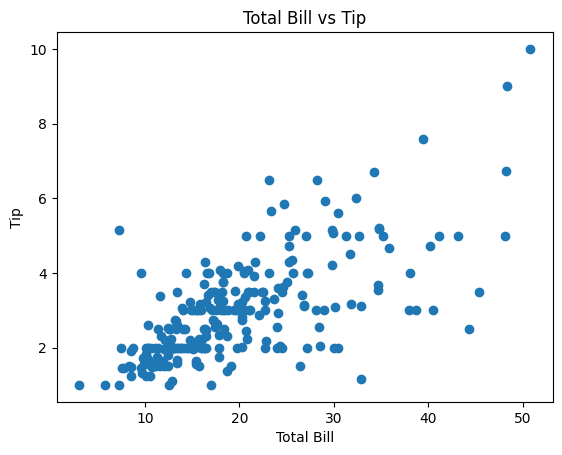

In [10]:
import matplotlib.pyplot as plt
plt.scatter(df['total_bill'],df['tip'])
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs Tip')
plt.show()

#observations#

1.As the bill increases the tip also increases

2.Relationship is a straight line

##FEATURE AND TARGET SEPERATION

In [11]:
x=df[['total_bill']]#Feature input in 2-D only
y=df['tip']#Feature output 1-D


##TRAIN-TEST-SPLIT
WHY-
to perform well on the unseen data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

##FEATURE STANDARDIZATION

to make them on the same scale

1.Compare the coefficients fairly

2.Avoid the dominance of the large values

3.Prepare for the ridge and lasso regressions

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scalar=StandardScaler()

In [16]:
x_train_scaled=scalar.fit_transform(x_train)
x_test_scaled=scalar.transform(x_test)
#***Fit only in training data***#
#***Prevents the data leakage***#
#***testing part -use tranform only 
#***training part -use fit_transform


#TRAIN LINEAR REGRESSION MODEL


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model=LinearRegression()
model.fit(x_train_scaled,y_train)
print("Coefficient(slope)=",model.coef_[0])
print("Intercept(c)=",model.intercept_)

Coefficient(slope)= 0.9357171400271826
Intercept(c)= 3.0877948717948724


In [19]:
y_pred=model.predict(x_test_scaled)

#MODEL EVAUATION METRICS

In [20]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print("R2 score=",r2)

R2 score= 0.5449381659234664


In [21]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("MSE",mse)
print("RMSE",rmse)


MSE 0.5688142529229538
RMSE 0.7541977545199626


#VISUALIZE BEST FIT LINE

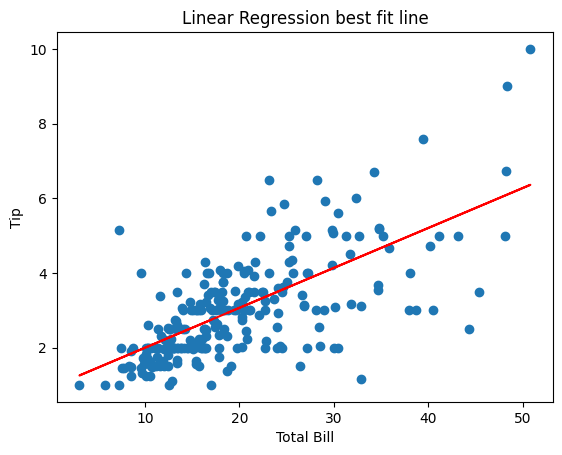

In [22]:
plt.scatter(x,y)
plt.plot(x,model.predict(scalar.transform(x)),color="red")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Linear Regression best fit line")
plt.show()


#INPUT-OUTPUT Real Time


In [25]:
bill_amount=float(input("Enter the bill amount"))
bill_scaled=scalar.transform([[bill_amount]])
predict_tip=model.predict(bill_scaled)
print(f"Predicted Tip :",predict_tip)

Predicted Tip : [11.62160624]


c:\Users\AMULYA GAJE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
